In [1]:
# Imports

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib
import datetime
import sklearn
from datetime import date
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

df = pd.read_csv('../input/customer-personality-analysis/marketing_campaign.csv',sep ='\t')
print(df)

         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...            

In [2]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.info
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [5]:
print(df["Z_Revenue"].unique())
print(df["Z_CostContact"].unique())

[11]
[3]


In [6]:
print(df.shape[0]) # 2240 rows
print(df.shape[1]) # 29 columns

2240
29


In [7]:
df[df.isna().any(axis=1)] # 24 rows with missing values

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


In [8]:
df.dropna(inplace=True) # drop missing values without losing too much data
df = df.drop('Z_Revenue', 1) # column values are uniform, will not be helpful
df = df.drop('Z_CostContact', 1) # see above

In [9]:
print(df)

         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  \
0            0  04-09-2012       58       635  ...          

In [10]:
year = datetime.datetime.today().year
print(year)
dob = df['Year_Birth'].values[0]

2022


In [11]:
# Create Age feature
df["Age"] = year - df["Year_Birth"]
print(df["Age"])
print(df)

0       65
1       68
2       57
3       38
4       41
        ..
2235    55
2236    76
2237    41
2238    66
2239    68
Name: Age, Length: 2216, dtype: int64
         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Marrie

In [12]:
from sklearn.cluster import KMeans

In [13]:
# K means clustering

kmeans = KMeans(n_clusters=4)
df["Cluster"] = kmeans.fit_predict(df[["Age", "Income"]]) # be careful in this step, select non string columns
df["Cluster"] = df["Cluster"].astype("category")

df.head(100)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Cluster
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,1,65,3
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,0,68,3
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,0,57,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,0,38,1
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,0,41,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,8908,1959,Graduation,Married,87195.0,0,0,08-05-2014,35,217,...,1,0,0,0,0,0,0,1,63,0
105,8373,1979,Basic,Together,24594.0,1,0,10-12-2013,94,1,...,5,0,0,0,0,0,0,0,43,1
106,7533,1964,Graduation,Married,49096.0,1,1,24-09-2013,15,144,...,7,0,0,0,0,0,0,0,58,3
107,2683,1969,Graduation,Married,52413.0,0,2,02-02-2013,56,295,...,6,0,0,0,0,0,0,0,53,3


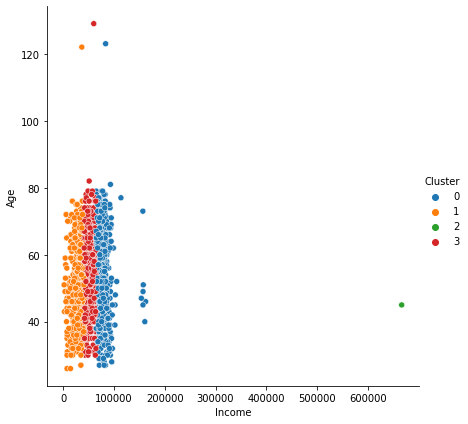

In [14]:
sns.relplot(
    x="Income", y="Age", hue="Cluster", data=df, height=6,
);
# First iteration requires lots of tuning

In [15]:
# Examine outlier
df[df['Income']==df['Income'].max()] #row 2233

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Cluster
2233,9432,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,...,6,0,0,0,0,0,0,0,45,2


In [16]:
df['Income'].max() # Value is 666 666 (unusual)
outl = df['Income'].max()


ages = [x
       for i, x in enumerate(df['Age'])
        if i!= outl]
incomes = [x
       for i, x in enumerate(df['Income'])
        if i!= outl]
print(np.corrcoef(ages, incomes))



[[1.         0.16179143]
 [0.16179143 1.        ]]


In [17]:
# For now we'll remove it
df = df.drop([2233],axis=0)
print(df) #2215 rows, 29 columns

         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...            

print(df["Z_CostContact"].unique())

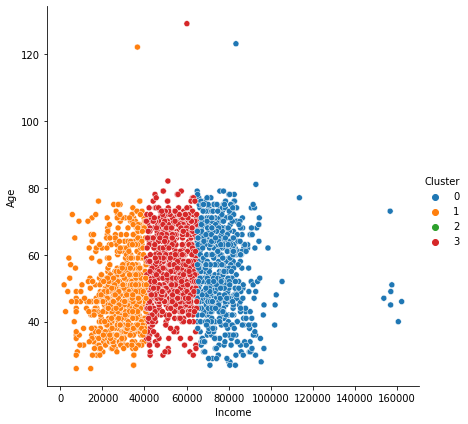

In [18]:
sns.relplot(
    x="Income", y="Age", hue="Cluster", data=df, height=6,
);

In [19]:
df.info() # should probably do this at the start
# advisable to change maritual status, education, dt_customer into int64 types
# moving forward, may want to look into dimensionality reduction

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2215 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   2215 non-null   int64   
 1   Year_Birth           2215 non-null   int64   
 2   Education            2215 non-null   object  
 3   Marital_Status       2215 non-null   object  
 4   Income               2215 non-null   float64 
 5   Kidhome              2215 non-null   int64   
 6   Teenhome             2215 non-null   int64   
 7   Dt_Customer          2215 non-null   object  
 8   Recency              2215 non-null   int64   
 9   MntWines             2215 non-null   int64   
 10  MntFruits            2215 non-null   int64   
 11  MntMeatProducts      2215 non-null   int64   
 12  MntFishProducts      2215 non-null   int64   
 13  MntSweetProducts     2215 non-null   int64   
 14  MntGoldProds         2215 non-null   int64   
 15  NumDealsPurchases    

In [20]:
# check for dup rows
duplicate = df[df.duplicated()]
  
print("Duplicate Rows :")
  
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Cluster


In [21]:
df.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [22]:
encode_edu = {"Education": {"Graduation": 0, "PhD": 2, "Master": 1, "Basic": 0, "2n Cycle": 1}}
df = df.replace(encode_edu)
print(df)

         ID  Year_Birth  Education Marital_Status   Income  Kidhome  Teenhome  \
0      5524        1957          0         Single  58138.0        0         0   
1      2174        1954          0         Single  46344.0        1         1   
2      4141        1965          0       Together  71613.0        0         0   
3      6182        1984          0       Together  26646.0        1         0   
4      5324        1981          2        Married  58293.0        1         0   
...     ...         ...        ...            ...      ...      ...       ...   
2235  10870        1967          0        Married  61223.0        0         1   
2236   4001        1946          2       Together  64014.0        2         1   
2237   7270        1981          0       Divorced  56981.0        0         0   
2238   8235        1956          1       Together  69245.0        0         1   
2239   9405        1954          2        Married  52869.0        1         1   

     Dt_Customer  Recency  

In [23]:
kmeans = KMeans(n_clusters=3)
df["Cluster"] = kmeans.fit_predict(df[["Age", "Income"]]) # be careful in this step, select non string columns
df["Cluster"] = df["Cluster"].astype("category")

df.head(100)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Cluster
0,5524,1957,0,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,1,65,0
1,2174,1954,0,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,0,68,0
2,4141,1965,0,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,0,57,1
3,6182,1984,0,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,0,38,2
4,5324,1981,2,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,0,41,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,8908,1959,0,Married,87195.0,0,0,08-05-2014,35,217,...,1,0,0,0,0,0,0,1,63,1
105,8373,1979,0,Together,24594.0,1,0,10-12-2013,94,1,...,5,0,0,0,0,0,0,0,43,2
106,7533,1964,0,Married,49096.0,1,1,24-09-2013,15,144,...,7,0,0,0,0,0,0,0,58,0
107,2683,1969,0,Married,52413.0,0,2,02-02-2013,56,295,...,6,0,0,0,0,0,0,0,53,0


In [24]:
df["Revenue"] = df["MntMeatProducts"] + df["MntSweetProducts"] + df["MntWines"] + df["MntFishProducts"] + df["MntFruits"] + df["MntGoldProds"]
print(df)

         ID  Year_Birth  Education Marital_Status   Income  Kidhome  Teenhome  \
0      5524        1957          0         Single  58138.0        0         0   
1      2174        1954          0         Single  46344.0        1         1   
2      4141        1965          0       Together  71613.0        0         0   
3      6182        1984          0       Together  26646.0        1         0   
4      5324        1981          2        Married  58293.0        1         0   
...     ...         ...        ...            ...      ...      ...       ...   
2235  10870        1967          0        Married  61223.0        0         1   
2236   4001        1946          2       Together  64014.0        2         1   
2237   7270        1981          0       Divorced  56981.0        0         0   
2238   8235        1956          1       Together  69245.0        0         1   
2239   9405        1954          2        Married  52869.0        1         1   

     Dt_Customer  Recency  

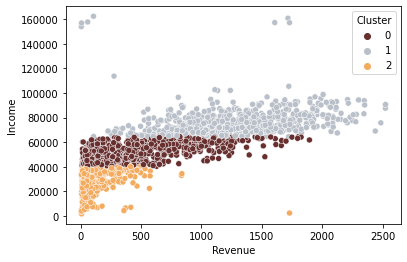

In [25]:
sns.scatterplot(data=df,x='Revenue',y='Income',hue='Cluster',palette=["#682F2F","#B9C0C9","#F3AB60"]);

In [26]:
df.Marital_Status.unique()
encode_marstat = {"Marital_Status": {"Single": 0, "Together": 1, "Married": 1, "Divorced": 2, "Alone": 0, 
                                    "Absurd": 2, 'YOLO': 2}}
df = df.replace(encode_edu)
print(df)

         ID  Year_Birth  Education Marital_Status   Income  Kidhome  Teenhome  \
0      5524        1957          0         Single  58138.0        0         0   
1      2174        1954          0         Single  46344.0        1         1   
2      4141        1965          0       Together  71613.0        0         0   
3      6182        1984          0       Together  26646.0        1         0   
4      5324        1981          2        Married  58293.0        1         0   
...     ...         ...        ...            ...      ...      ...       ...   
2235  10870        1967          0        Married  61223.0        0         1   
2236   4001        1946          2       Together  64014.0        2         1   
2237   7270        1981          0       Divorced  56981.0        0         0   
2238   8235        1956          1       Together  69245.0        0         1   
2239   9405        1954          2        Married  52869.0        1         1   

     Dt_Customer  Recency  

In [27]:
df = df[df.Marital_Status != 'YOLO']

In [28]:
df = df[df.Marital_Status != 'Absurd']
print(df)

         ID  Year_Birth  Education Marital_Status   Income  Kidhome  Teenhome  \
0      5524        1957          0         Single  58138.0        0         0   
1      2174        1954          0         Single  46344.0        1         1   
2      4141        1965          0       Together  71613.0        0         0   
3      6182        1984          0       Together  26646.0        1         0   
4      5324        1981          2        Married  58293.0        1         0   
...     ...         ...        ...            ...      ...      ...       ...   
2235  10870        1967          0        Married  61223.0        0         1   
2236   4001        1946          2       Together  64014.0        2         1   
2237   7270        1981          0       Divorced  56981.0        0         0   
2238   8235        1956          1       Together  69245.0        0         1   
2239   9405        1954          2        Married  52869.0        1         1   

     Dt_Customer  Recency  

In [29]:
encode_marstat = {"Marital_Status": {"Married": "Together", "Alone": "Single", "Widow": "Single"}}
df = df.replace(encode_marstat)
df.Marital_Status.unique()

array(['Single', 'Together', 'Divorced'], dtype=object)

In [30]:
one_hot = pd.get_dummies(df['Marital_Status'])
# Drop column B as it is now encoded
df = df.drop('Marital_Status',axis = 1)
# Join the encoded df
df = df.join(one_hot)
print(df)

         ID  Year_Birth  Education   Income  Kidhome  Teenhome Dt_Customer  \
0      5524        1957          0  58138.0        0         0  04-09-2012   
1      2174        1954          0  46344.0        1         1  08-03-2014   
2      4141        1965          0  71613.0        0         0  21-08-2013   
3      6182        1984          0  26646.0        1         0  10-02-2014   
4      5324        1981          2  58293.0        1         0  19-01-2014   
...     ...         ...        ...      ...      ...       ...         ...   
2235  10870        1967          0  61223.0        0         1  13-06-2013   
2236   4001        1946          2  64014.0        2         1  10-06-2014   
2237   7270        1981          0  56981.0        0         0  25-01-2014   
2238   8235        1956          1  69245.0        0         1  24-01-2014   
2239   9405        1954          2  52869.0        1         1  15-10-2012   

      Recency  MntWines  MntFruits  ...  AcceptedCmp1  Accepted

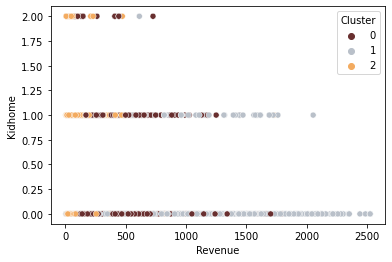

In [31]:
sns.scatterplot(data=df,x='Revenue',y='Kidhome',hue='Cluster',palette=["#682F2F","#B9C0C9","#F3AB60"]);

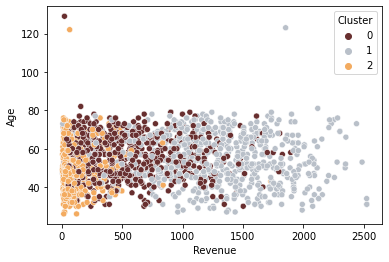

In [32]:
sns.scatterplot(data=df,x='Revenue',y='Age',hue='Cluster',palette=["#682F2F","#B9C0C9","#F3AB60"]);

In [33]:
means = df.groupby('Cluster').mean()
print(means)

                  ID   Year_Birth  Education        Income   Kidhome  \
Cluster                                                                
0        5356.923567  1966.003822   0.775796  52275.707006  0.407643   
1        5761.883890  1967.404935   0.706821  76909.097242  0.088534   
2        5665.546811  1973.104478   0.578019  28283.378562  0.810041   

         Teenhome    Recency    MntWines  MntFruits  MntMeatProducts  ...  \
Cluster                                                               ...   
0        0.821656  49.629299  289.341401  18.515924        98.030573  ...   
1        0.354136  49.079826  617.219158  56.962264       396.941945  ...   
2        0.310719  48.442334   30.287653   6.016282        25.607870  ...   

         AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
Cluster                                                                 
0            0.005096      0.019108      0.015287  0.005096  0.107006   
1            0.227866      0.18142

* Cluster 0: Moderate-income customers with teenagers, moderate spending
* Cluster 1: Low-income customers with young children, very low spending
* Cluster 2: High-income customers without children, high spending